In [224]:
import torch
from torch.autograd import Variable
import cv2
from data import BaseTransform, VOC_CLASSES as labelmap
from ssd import build_ssd
import matplotlib.pyplot as plt

In [225]:
sheep = cv2.imread("sheeps-3437467_640.jpg")

In [228]:
def detect(frame, net, transform):
    
    height, width = frame.shape[:2]
    frame_t = transform(frame)[0]
    #frame_t = transform.prepare_input(frame) 
    x = torch.from_numpy(frame_t).permute(2, 0, 1)
    #x = transform.prepare_tensor(frame_t).permute(2, 0, 1)
    x = Variable(x.unsqueeze(0))
    y = net(x)
    detections = y.data
    scale = torch.Tensor([width, height, width, height])
             
    for i in range(detections.size(1)):
        j = 0
        while detections[0, i, j, 0] >= 0.5:
            pt = (detections[0, i, j, 1:] * scale).numpy()
            cv2.rectangle(frame, (int(pt[0]), int(pt[1])), (int(pt[2]), int(pt[3])), (255, 0, 0), 2)
            cv2.putText(frame, labelmap[i - 1], (int(pt[0]), int(pt[1])), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 2, cv2.LINE_AA)
            j += 1
    return frame

In [229]:
net = build_ssd('test')
net.load_state_dict(torch.load('ssd300_mAP_77.43_v2.pth', map_location = lambda storage, loc:storage))

<All keys matched successfully>

In [230]:
transform = BaseTransform(net.size,  (104/256.0, 117/256.0, 123/256.0))

In [231]:
#for i in range(10):
detected_img = detect(sheep, net.eval(), transform)

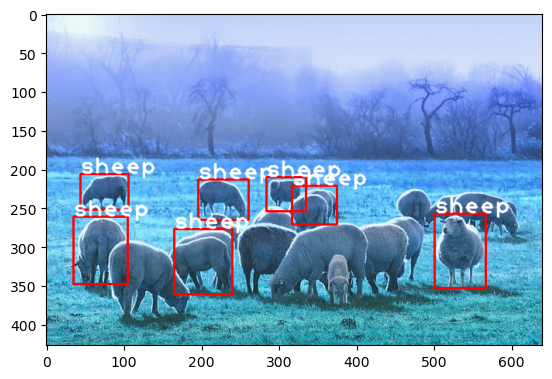

In [232]:
plt.imshow(detected_img)